In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

### Dataset: VHM Historical Data

In [2]:
data = pd.read_csv('../Datasets/1 - VHM Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data
df = data

#### Ratio 7:3

In [3]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) - train_size) 

len(df), train_size, test_size

(1313, 919, 394)

In [4]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

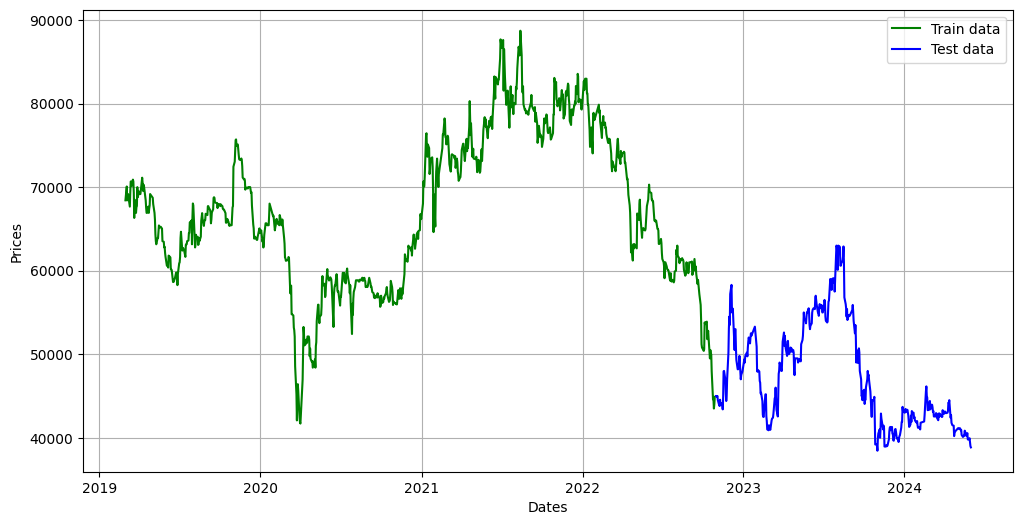

In [5]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [6]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [7]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


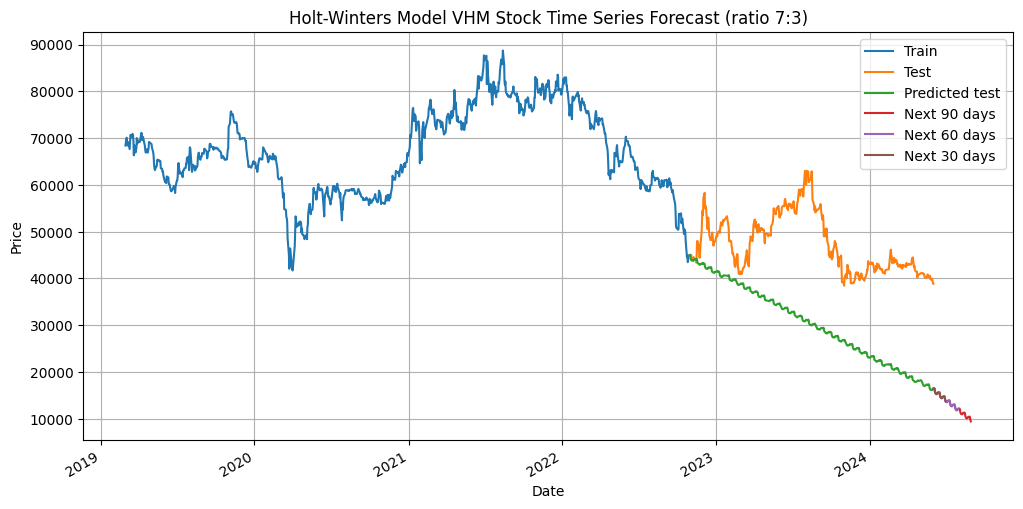

In [8]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 18596.239691987317
Testing MAPE: 35.908284215889694
Testing MAE: 16966.041160003213


#### Ratio 8:2

In [10]:
train_size = round(len(df) * 0.8)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 1050, 263)

In [11]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

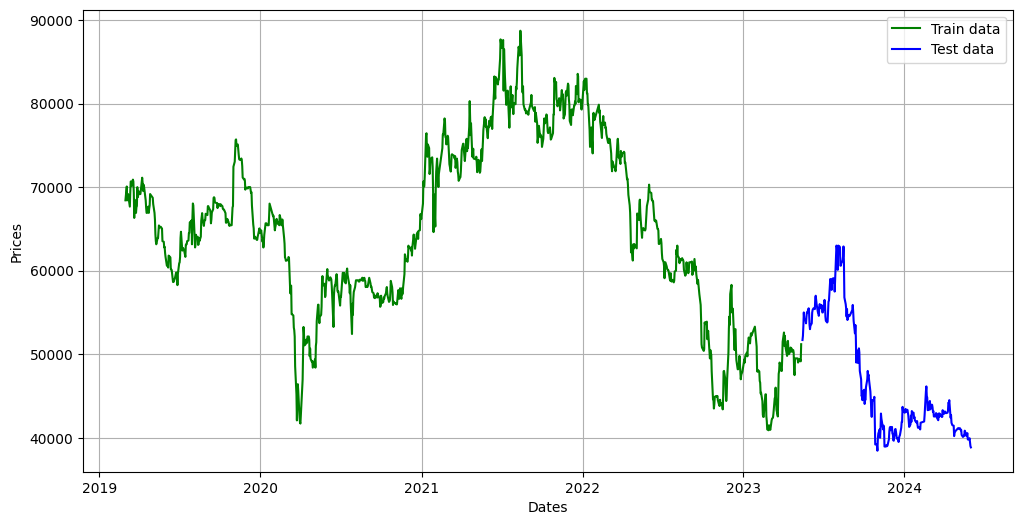

In [12]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [13]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [14]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


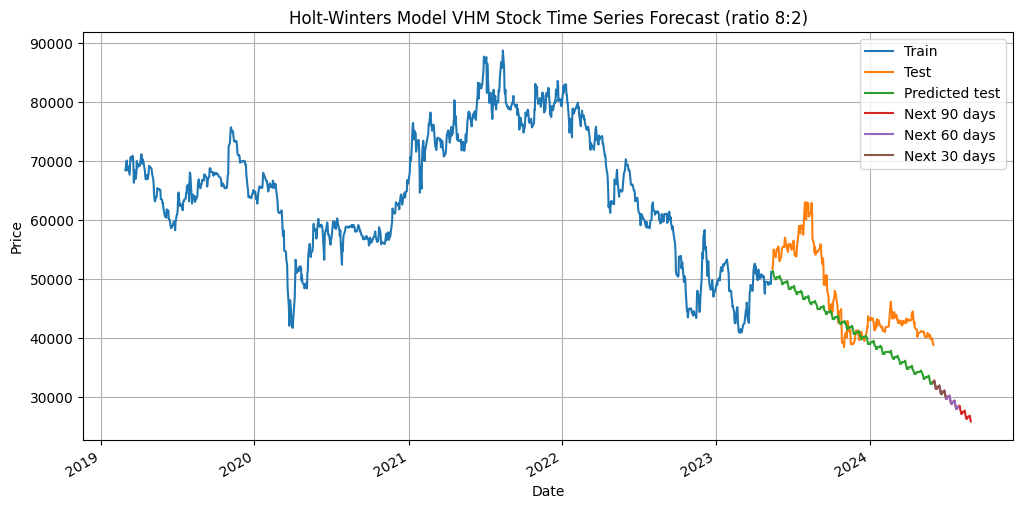

In [15]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 6850.860540251228
Testing MAPE: 11.825313783886342
Testing MAE: 5753.9180270460365


#### Ratio 9:1

In [17]:
train_size = round(len(df) * 0.9)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 1182, 131)

In [18]:
train_data = df[:train_size+1]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1183, 6), (131, 6))

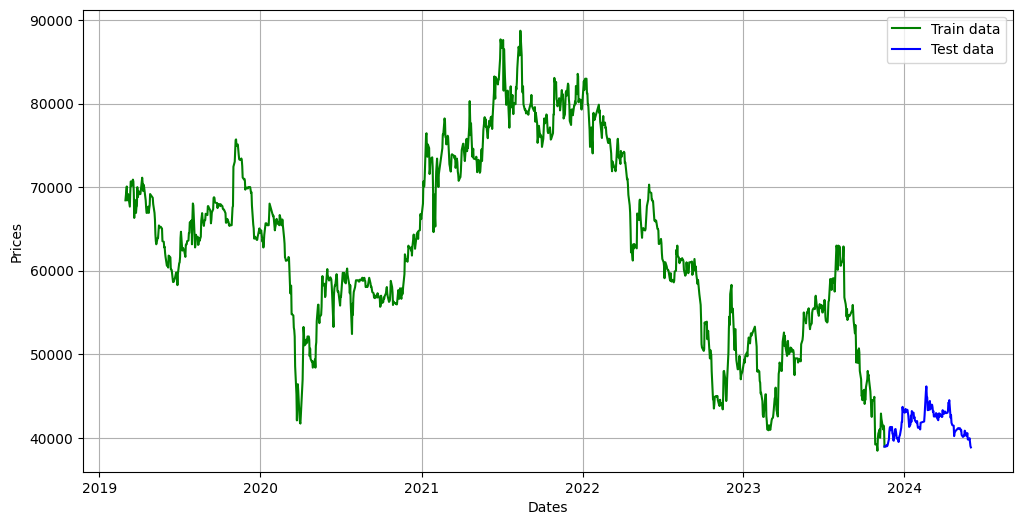

In [19]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [20]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [21]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


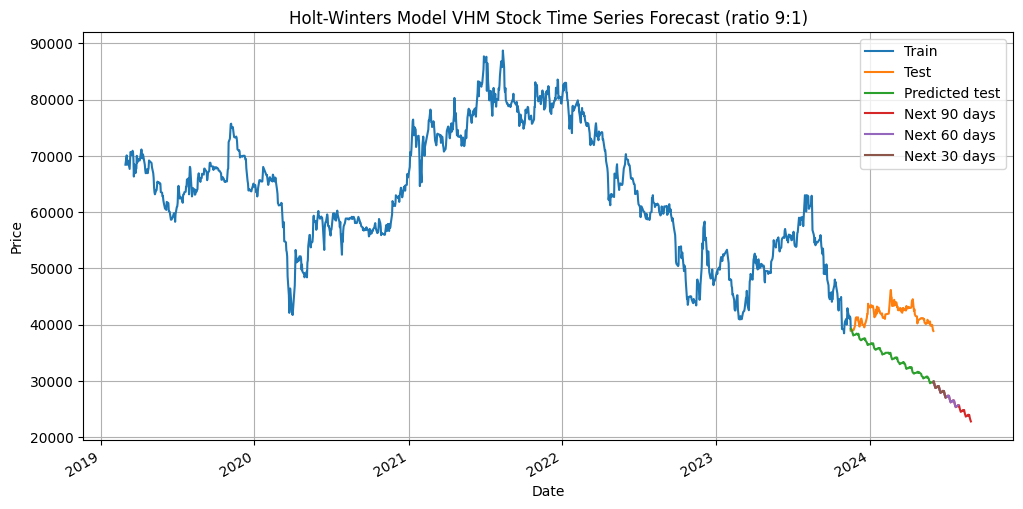

In [22]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 8254.946175899353
Testing MAPE: 18.086132885971907
Testing MAE: 7613.2267920752165


### Dataset: NVL Historical Data

In [24]:
data = pd.read_csv('../Datasets/2 - NVL Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data
df = data


#### Ratio 7:3

In [25]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 919, 394)

In [26]:
train_data = df[:train_size+1]
test_data = df[train_size:train_size+test_size]

train_data.shape, test_data.shape

((920, 6), (394, 6))

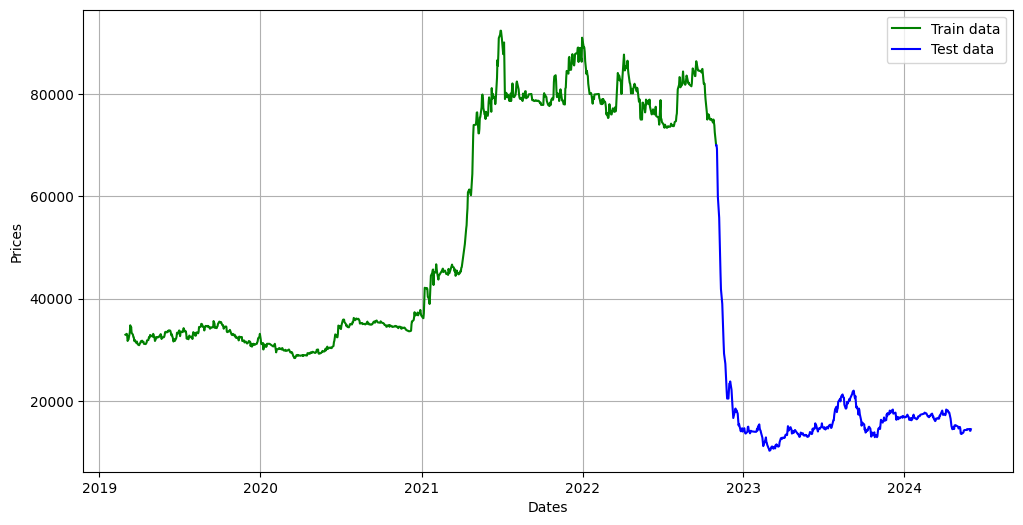

In [27]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [28]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


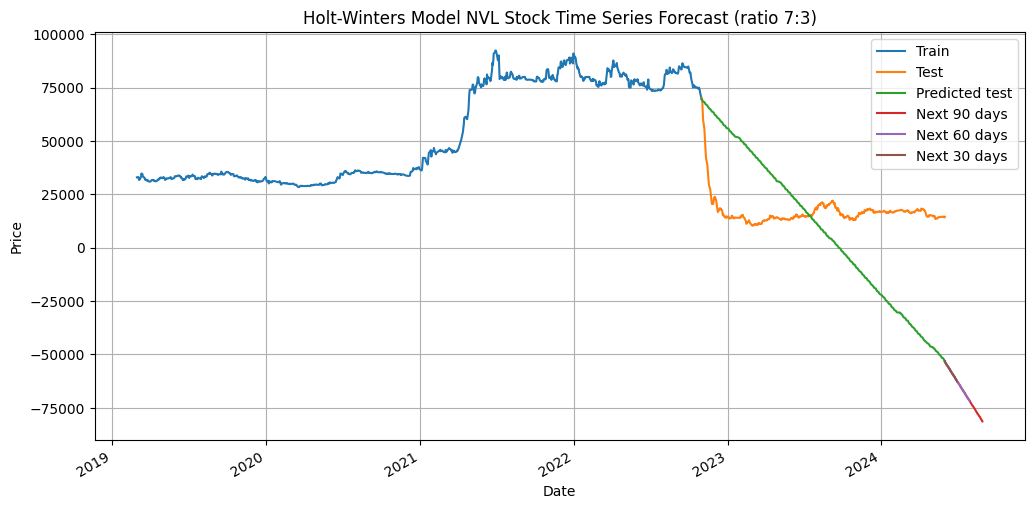

In [30]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 35702.2692123635
Testing MAPE: 198.2647898165106
Testing MAE: 31001.11634874496


#### Ratio 8:2

In [32]:
train_size = round(len(df) * 0.8)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 1050, 263)

In [33]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

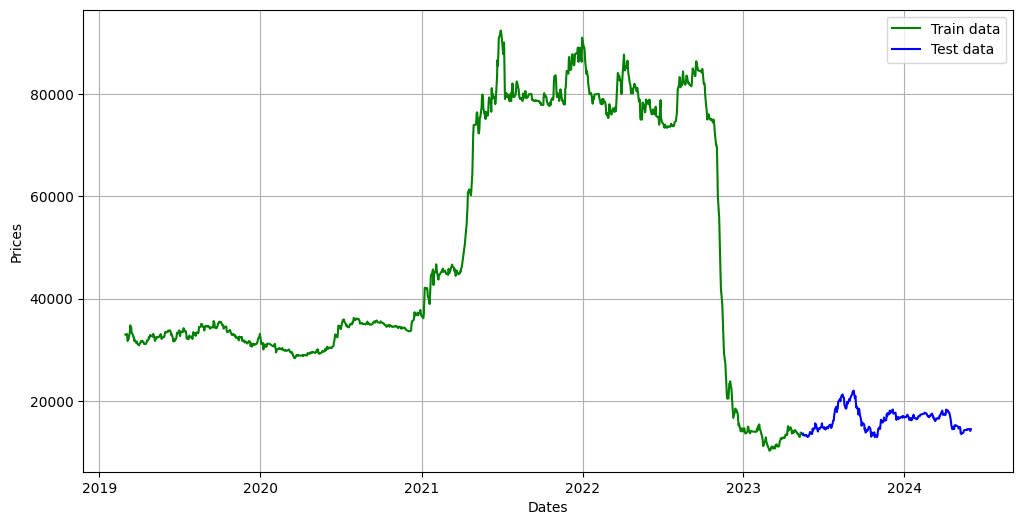

In [34]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [35]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [36]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


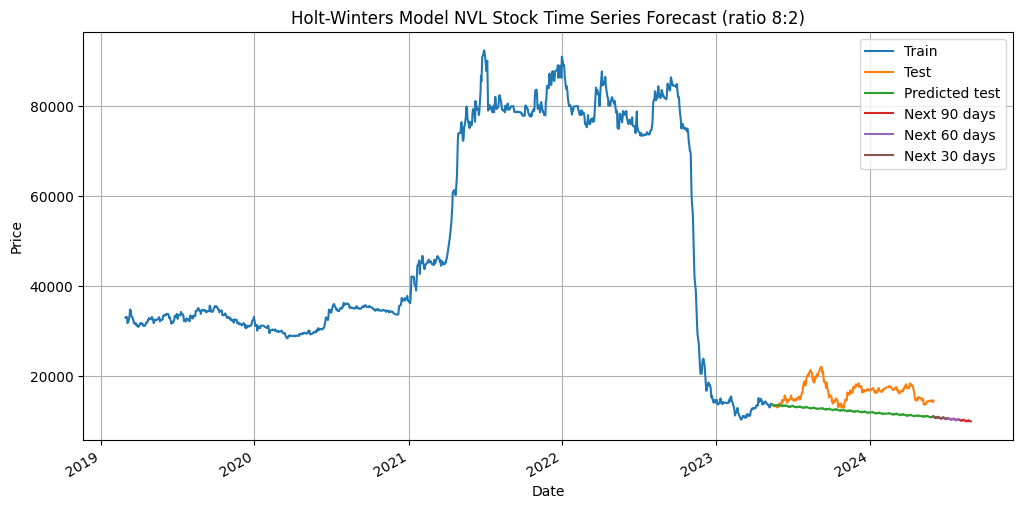

In [37]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 4663.010005874332
Testing MAPE: 24.148924897090243
Testing MAE: 4119.60138780341


#### Ratio 9:1

In [39]:
train_size = round(len(df) * 0.9)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 1182, 131)

In [40]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

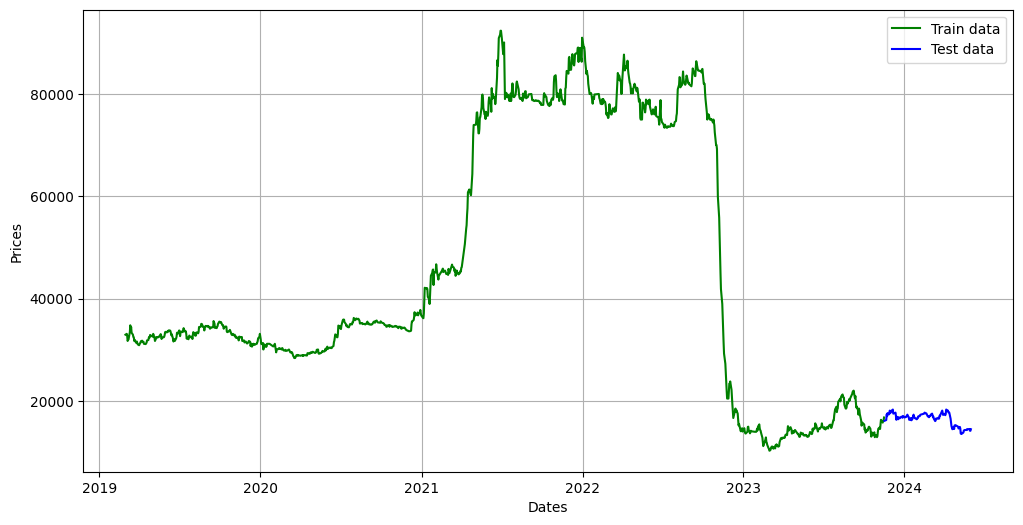

In [41]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [42]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [43]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


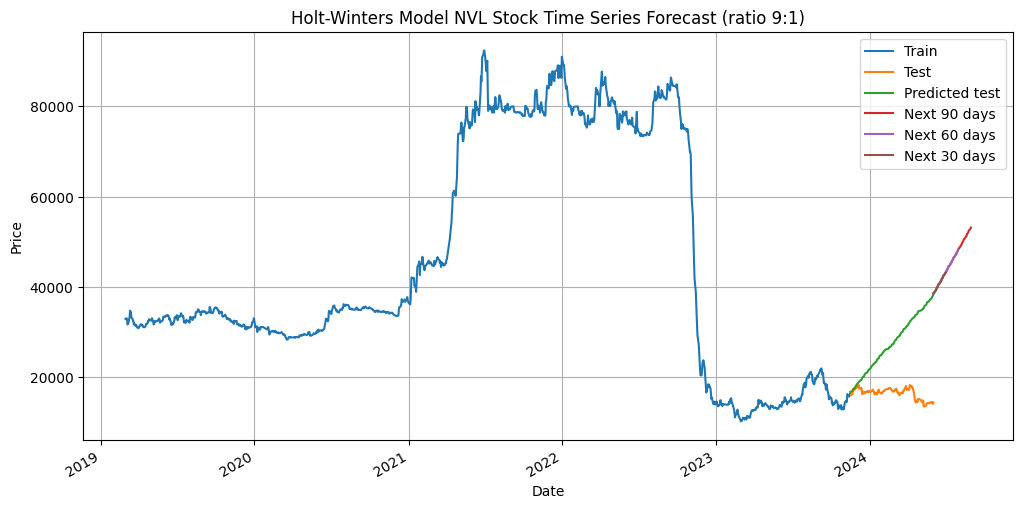

In [44]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 13119.49420616873
Testing MAPE: 69.98053851525799
Testing MAE: 11042.107408352562


### Dataset: NLG Historical Data

In [46]:
data = pd.read_csv('../Datasets/3 - NLG Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data
df = data


#### Ratio 7:3

In [47]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 919, 394)

In [48]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

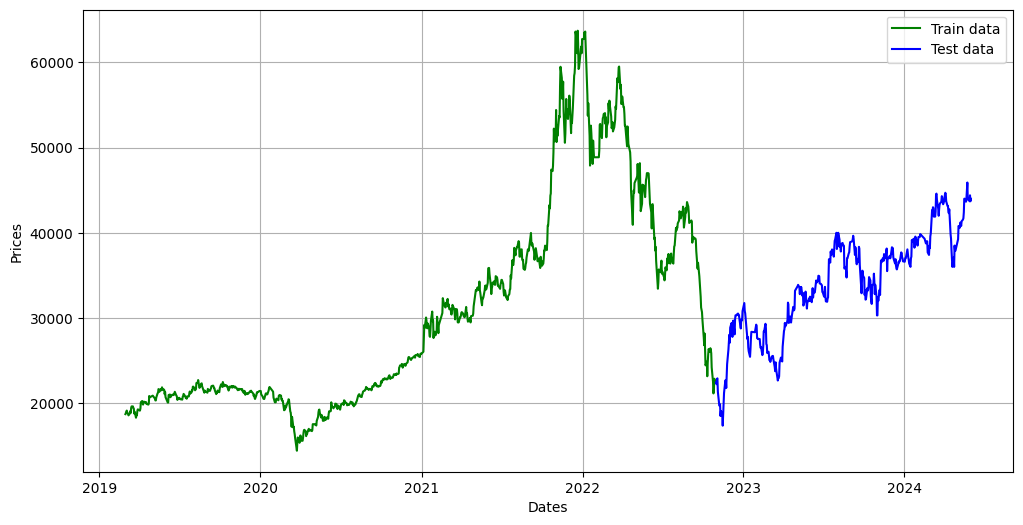

In [49]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [50]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


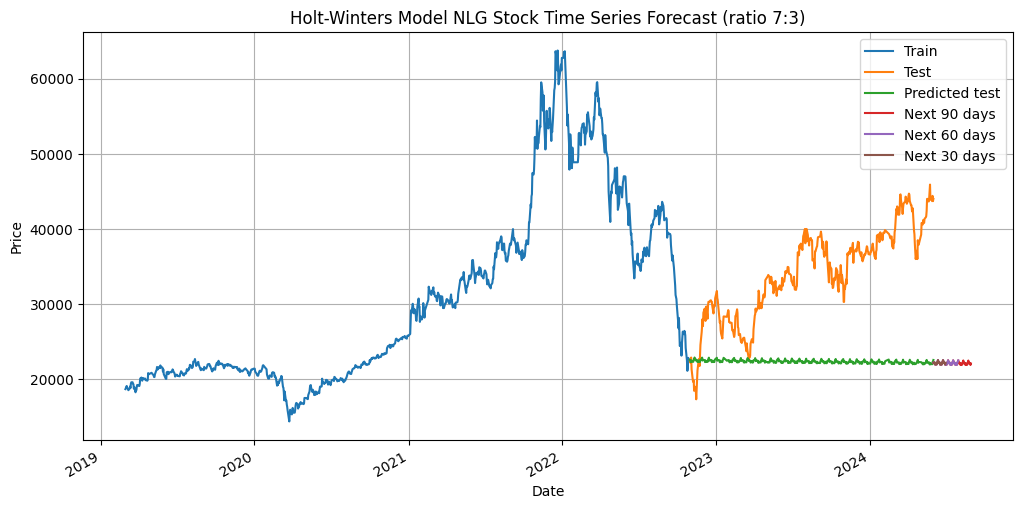

In [52]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 13169.349797708554
Testing MAPE: 32.621422056174424
Testing MAE: 11813.673501056306


#### Ratio 8:2

In [54]:
train_size = round(len(df) * 0.8)
test_size = round(len(df) - train_size)

len(df), train_size, test_size

(1313, 1050, 263)

In [55]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

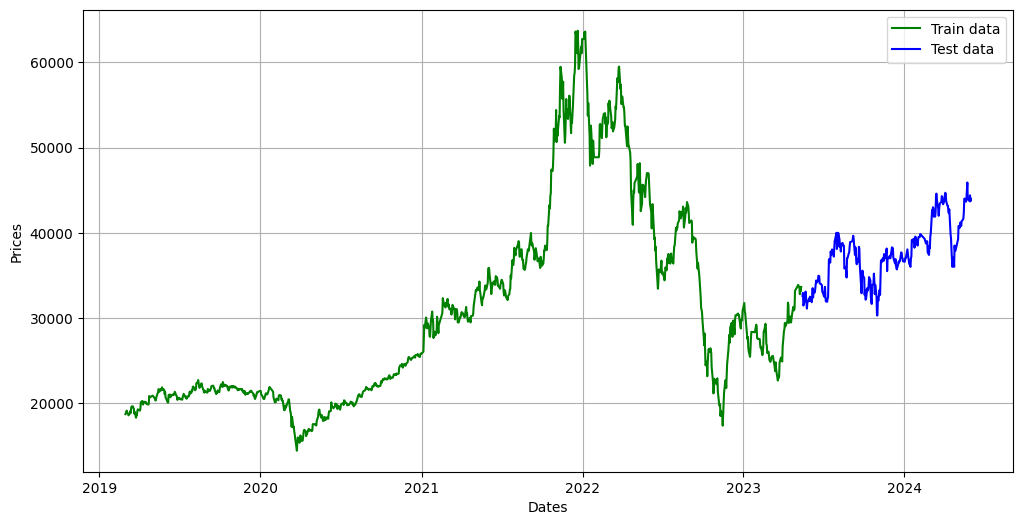

In [56]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [57]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [58]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


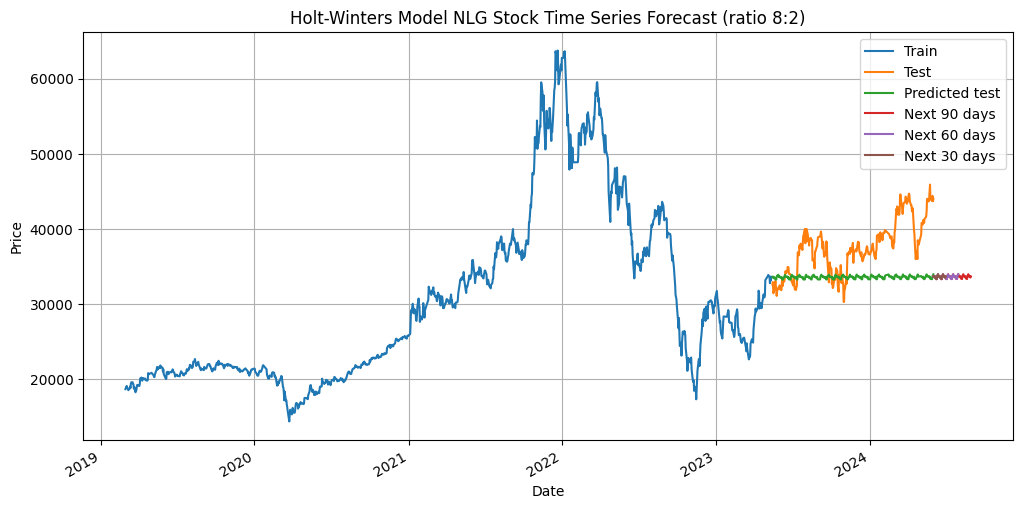

In [59]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 5296.755801130843
Testing MAPE: 10.866071944176808
Testing MAE: 4307.0518355186805


#### Ratio 9:1

In [61]:
train_size = round(len(df) * 0.9)
test_size = round(len(df) - train_size) 

len(df), train_size, test_size

(1313, 1182, 131)

In [62]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

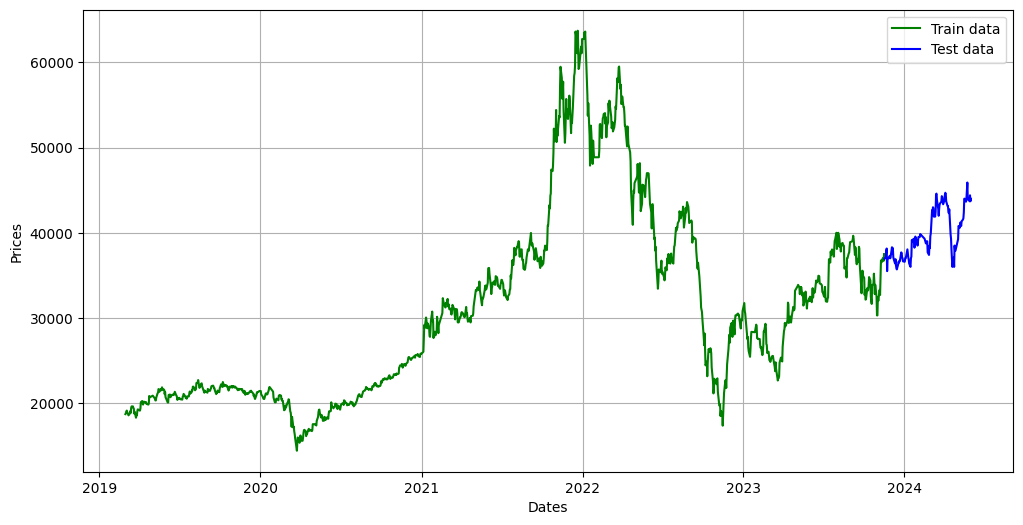

In [63]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [64]:
model = ExponentialSmoothing(np.asarray(train_data['Price']), trend='add', seasonal='add', seasonal_periods=12).fit()

d:\LearnPython\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [65]:
test_data['Price Predicted'] = model.forecast(len(test_data))

C:\Users\KIm Anh\AppData\Local\Temp\ipykernel_14776\2474305646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = model.forecast(len(test_data))


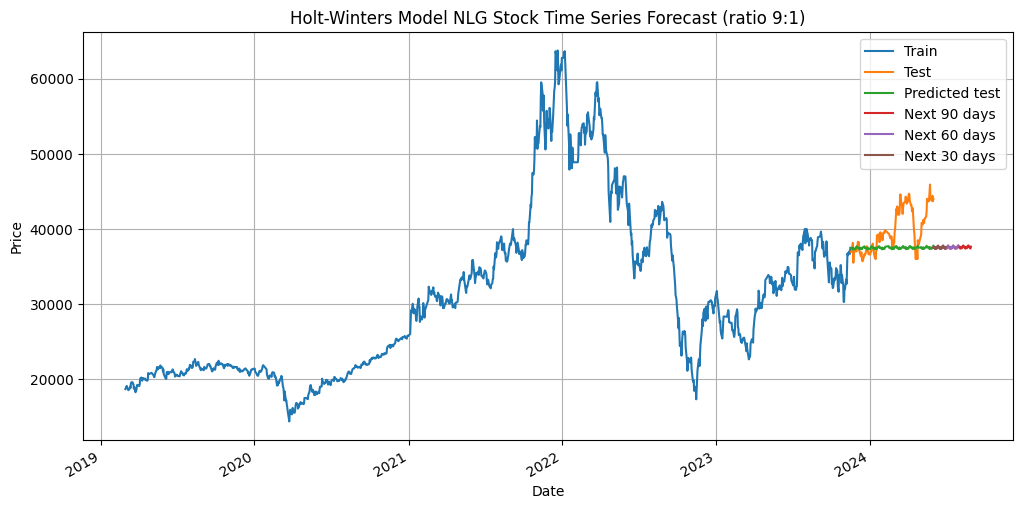

In [66]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.date_range(start=test_data.index[-1], periods=30)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(next_30_days) + len(test_data))[-30:]

# Predict prices for the next 60 days
next_60_days = pd.date_range(start=test_data.index[-1], periods=60)
y_next_60_days = model.forecast(len(next_60_days) + len(test_data))[-60:]

# Predict prices for the next 90 days
next_90_days = pd.date_range(start=test_data.index[-1], periods=90)
y_next_90_days = model.forecast(len(next_90_days) + len(test_data))[-90:]

plt.plot(next_90_days, y_next_90_days, label='Next 90 days')
plt.plot(next_60_days, y_next_60_days, label='Next 60 days')
plt.plot(next_30_days, y_next_30_days, label='Next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((test_data['Price Predicted'] - test_data['Price'])**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((test_data['Price'] - test_data['Price Predicted']) / test_data['Price'])) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(test_data['Price Predicted'] - test_data['Price']))
print("Testing MAE:", test_mae)

Testing RMSE: 3724.446038673757
Testing MAPE: 6.686026269648815
Testing MAE: 2815.2639174734777
